In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from astropy import constants as const
from scipy import interpolate
from bit_tools.mission_tools import Mission
import bit_tools as bt
mpl.rc('font', family='serif', serif = "cmr10", size=18)
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams["errorbar.capsize"] = 5
mpl.rcParams['axes.unicode_minus'] = False

from mag_converter import *

In [9]:
# Load the Galaxy SED Templates
elliptical_template = np.genfromtxt('galaxy_spectra_kinney96/elliptical_template.ascii', usecols=range(2), invalid_raise=False)

starburst_all = [[], [], [], [], [], []]
for i in range(1, 7):
    starburst_all[i-1] = np.genfromtxt('galaxy_spectra_kinney96/starb%i_template.ascii' %(i), usecols=range(2), invalid_raise=False)

starburst_template = np.mean( np.array([starburst_all[0], starburst_all[1], starburst_all[2], starburst_all[3], starburst_all[4], starburst_all[5]]), axis=0 )

In [10]:
# Load the extracted data from the plot. [:,0] is the redshift, [:,1] is the fraction
disk_frac = np.genfromtxt('gal_types/disks.csv', invalid_raise=False,delimiter=',')
ellip_frac = np.genfromtxt('gal_types/ellips.csv', invalid_raise=False,delimiter=',')
pec_frac = np.genfromtxt('gal_types/pecs.csv', invalid_raise=False,delimiter=',')

# Create interpolation objects for the fractions
disk_frac = interpolate.interp1d(disk_frac[:,0],disk_frac[:,1],fill_value=(disk_frac[:,1][0],disk_frac[:,1][-1]),bounds_error=False)
ellip_frac = interpolate.interp1d(ellip_frac[:,0],ellip_frac[:,1],fill_value=(ellip_frac[:,1][0],ellip_frac[:,1][-1]),bounds_error=False)
pec_frac = interpolate.interp1d(pec_frac[:,0],pec_frac[:,1],fill_value=(pec_frac[:,1][0],pec_frac[:,1][-1]),bounds_error=False)


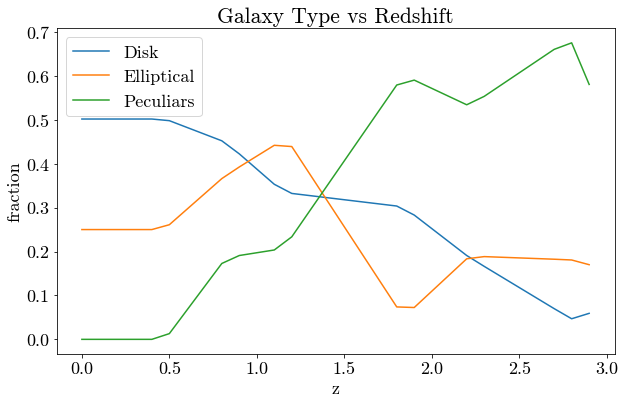

In [11]:
zs = np.arange(0,3,0.1)
plt.figure(figsize=(10,6))
plt.plot(zs,disk_frac(zs), label="Disk")
plt.plot(zs,ellip_frac(zs), label="Elliptical")
plt.plot(zs,pec_frac(zs), label="Peculiars")
plt.title("Galaxy Type vs Redshift")
plt.xlabel("z")
plt.ylabel("fraction")
plt.legend()


In [12]:
# Defining useful functions
def get_gal_type(z):
    rand = np.random.uniform(0,ellip_frac(z)+disk_frac(z) + pec_frac(z))
    if rand <= disk_frac(z):
        return starburst_template
    if disk_frac(z)<rand <= ellip_frac(z)+disk_frac(z):
        return elliptical_template
    if ellip_frac(z)+disk_frac(z) < rand <= ellip_frac(z)+disk_frac(z) + pec_frac(z):
        return starburst_template

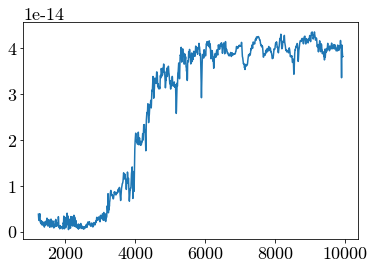

In [21]:
gal = get_gal_type(1.4)
plt.plot(gal[:,0], gal[:,1], label='Galaxy Spectrum')
